In [1]:
import pandas as pd

In [2]:
load_path = 'processed_data/data_2006_2023.csv'


In [3]:
load_data = pd.read_csv(load_path)

In [4]:
load_data

,loadConsumption,date,datetime,Hour,Year
0,10215.0000,2006-01-01,2005-12-31 23:00:00,0,2006
1,9979.0000,2006-01-01,2006-01-01 00:00:00,1,2006
2,9460.0000,2006-01-01,2006-01-01 01:00:00,2,2006
3,8833.0000,2006-01-01,2006-01-01 02:00:00,3,2006
4,8525.0000,2006-01-01,2006-01-01 03:00:00,4,2006
...,...,...,...,...,...
157767,12673.4650,2023-12-31,2023-12-31 19:00:00,20,2023
157768,12366.1950,2023-12-31,2023-12-31 20:00:00,21,2023
157769,12143.1775,2023-12-31,2023-12-31 21:00:00,22,2023
157770,11993.1200,2023-12-31,2023-12-31 22:00:00,23,2023


In [5]:
load_data["date"] = pd.to_datetime(load_data["date"])

In [6]:
import holidays

In [7]:
# Initialize Netherlands holidays
nl_holidays = holidays.Netherlands(years=range(2006, 2024))

# Add a "holiday" column: 1 if the date is a holiday, 0 otherwise
load_data["holiday"] = load_data["date"].apply(lambda x: 1 if x in nl_holidays else 0)


In [8]:
load_data

,loadConsumption,date,datetime,Hour,Year,holiday
0,10215.0000,2006-01-01,2005-12-31 23:00:00,0,2006,1
1,9979.0000,2006-01-01,2006-01-01 00:00:00,1,2006,1
2,9460.0000,2006-01-01,2006-01-01 01:00:00,2,2006,1
3,8833.0000,2006-01-01,2006-01-01 02:00:00,3,2006,1
4,8525.0000,2006-01-01,2006-01-01 03:00:00,4,2006,1
...,...,...,...,...,...,...
157767,12673.4650,2023-12-31,2023-12-31 19:00:00,20,2023,0
157768,12366.1950,2023-12-31,2023-12-31 20:00:00,21,2023,0
157769,12143.1775,2023-12-31,2023-12-31 21:00:00,22,2023,0
157770,11993.1200,2023-12-31,2023-12-31 22:00:00,23,2023,0


In [9]:
import matplotlib.pyplot as plt

In [10]:
load_data["datetime"] = pd.to_datetime(load_data["datetime"])

                                       
load_data.set_index("datetime", inplace=True)

# Resample data to daily averages for better visualization
daily_data = load_data["loadConsumption"].resample("D").mean()

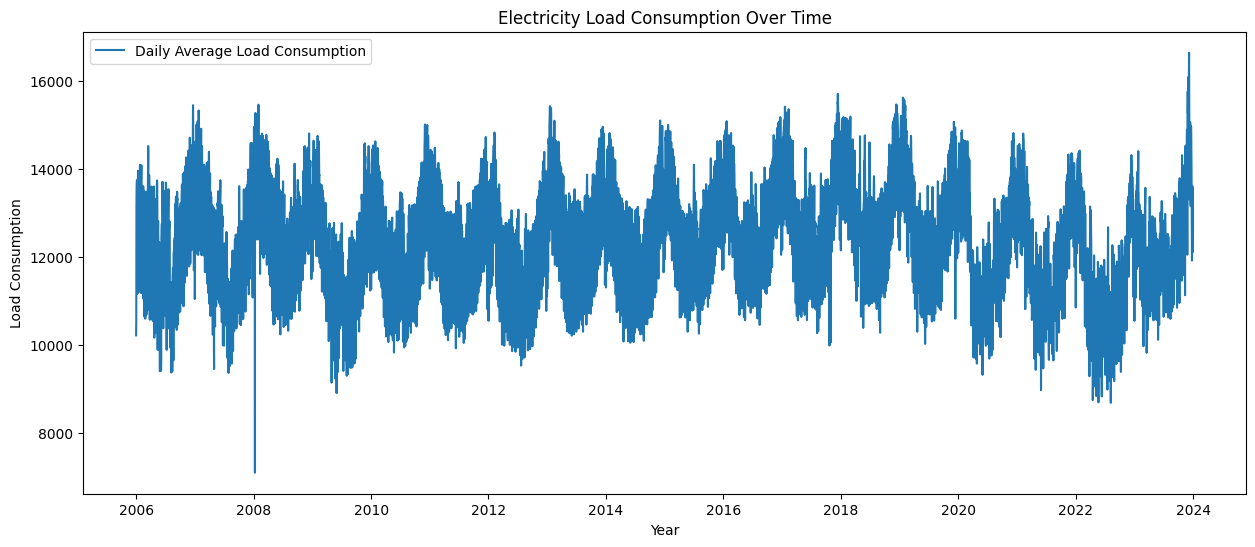

In [12]:
# Plot the full time series to observe trends
plt.figure(figsize=(15, 6))
plt.plot(daily_data, label="Daily Average Load Consumption")
plt.xlabel("Year")
plt.ylabel("Load Consumption")
plt.title("Electricity Load Consumption Over Time")
plt.legend()
plt.show()

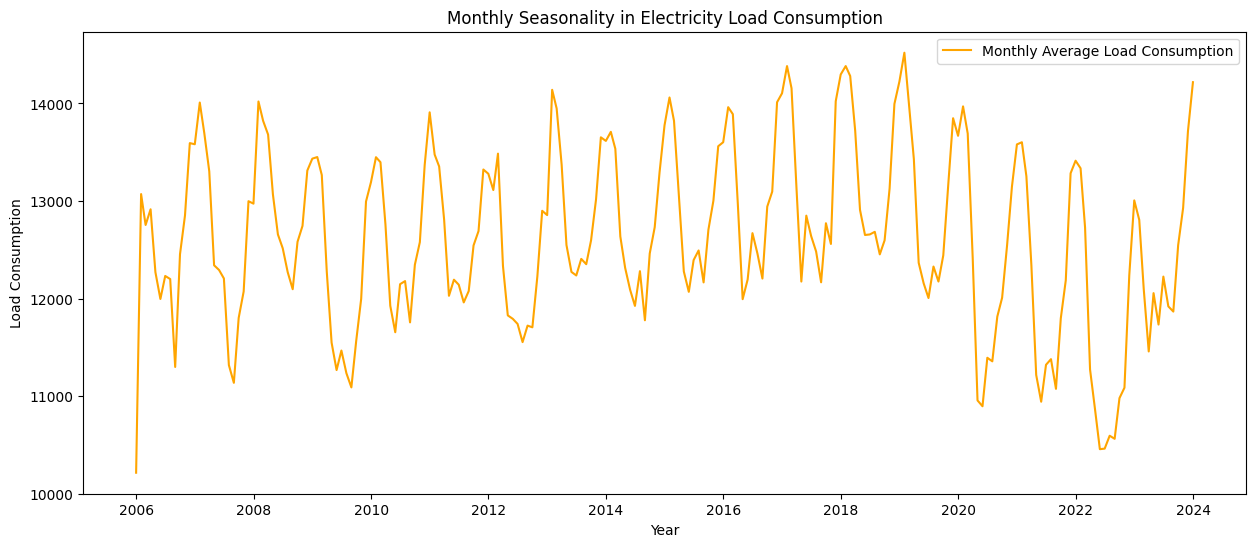

In [13]:
# Plot seasonality by averaging over months
monthly_data = load_data["loadConsumption"].resample("M").mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_data, label="Monthly Average Load Consumption", color='orange')
plt.xlabel("Year")
plt.ylabel("Load Consumption")
plt.title("Monthly Seasonality in Electricity Load Consumption")
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

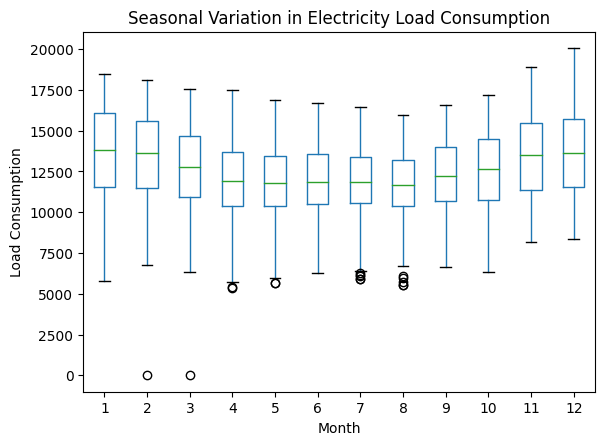

In [14]:
# Boxplot to visualize seasonal variations by month
load_data["Month"] = load_data.index.month

plt.figure(figsize=(12, 6))
load_data.boxplot(column="loadConsumption", by="Month", grid=False)
plt.xlabel("Month")
plt.ylabel("Load Consumption")
plt.title("Seasonal Variation in Electricity Load Consumption")
plt.suptitle("")
plt.show()

In [15]:
import numpy as np
import statsmodels.api as sm

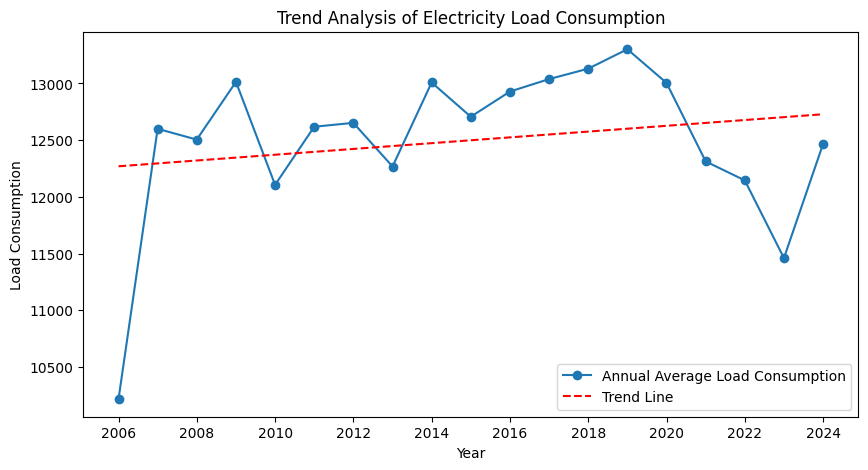

C:\Users\mahmo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.7254
Date:                Fri, 31 Jan 2025   Prob (F-statistic):              0.406
Time:                        15:02:54   Log-Likelihood:                -150.77
No. Observations:                  19   AIC:                             305.5
Df Residuals:                      17   BIC:                             307.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.227e+04    315.431     38.897      0.000    1.16e+04    1.29e+04
x1            25.4995     29.939      0.852      0.406     -37.667      88.666
==============================================================================
Omnibus:                       14.481   Durbin-Watson:                   1.141
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.563
Skew:                          -1.627   Prob(JB):                      0.00187
Kurtosis:                       5.299   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Aggregate data by year to observe long-term trends
annual_data = load_data["loadConsumption"].resample("Y").mean()

# Fit a linear regression model to detect trend
X = np.arange(len(annual_data)).reshape(-1, 1)  # Time index
y = annual_data.values  # Load consumption values

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()
trend_slope = model.params[1]  # Slope of the trend

# Generate trend line
trend_line = model.predict(X)

# Plot the actual data and the trend line
plt.figure(figsize=(10, 5))
plt.plot(annual_data.index, annual_data, label="Annual Average Load Consumption", marker="o")
plt.plot(annual_data.index, trend_line, label="Trend Line", linestyle="--", color="red")
plt.xlabel("Year")
plt.ylabel("Load Consumption")
plt.title("Trend Analysis of Electricity Load Consumption")
plt.legend()
plt.show()

# Display regression summary
model.summary()

Statistical Findings:

- The slope of the trend line (25.50) suggests a slight upward trend, indicating a small increase in electricity consumption over time.
- However, the p-value (0.406) for the trend coefficient suggests that this increase is not statistically significant at conventional confidence levels (e.g., 95% confidence).
- The R-squared value (0.041) indicates that only about 4.1% of the variation in load consumption can be explained by the passage of time.

Conclusion:
- The data does not provide strong evidence for a clear increasing or decreasing trend in electricity consumption.
- While there is a slight positive slope, the changes over time appear to be relatively small and not statistically significant.
- Additional factors such as economic cycles, policy changes, and seasonal effects might influence the consumption more than a simple time-based trend.

In [18]:
file_path_main = 'final_data_daily.csv'
file_path_regional = 'processed_data/resedentialEnergyData(Provincies).csv'

df_main = pd.read_csv(file_path_main)
df_regional = pd.read_csv(file_path_regional)

# Ensure 'date' is in datetime format
df_main.rename(columns={"Date": "date"}, inplace=True)
df_main["date"] = pd.to_datetime(df_main["date"])

# Extract 'Year' from 'date' in df_main
df_main["Year"] = df_main["date"].dt.year

# Filter df_main to keep only data between 2010 and 2022
df_main = df_main[(df_main["date"] >= "2010-01-01") & (df_main["date"] <= "2022-12-31")]

# Ensure 'Year' exists in df_regional
if "Year" not in df_regional.columns:
    df_regional["Year"] = pd.to_datetime(df_regional["date"]).dt.year

df_regional["Year"] = df_regional["Year"].astype(int)

# Expand the regional dataset by duplicating each year's data for all days in that year
daily_dates = pd.date_range(start="2010-01-01", end="2022-12-31", freq="D")
daily_expansion = pd.DataFrame({"date": daily_dates})
daily_expansion["Year"] = daily_expansion["date"].dt.year

# Merge daily dates with the regional dataset
expanded_regional = daily_expansion.merge(df_regional, on="Year", how="left")

# Merge main dataset with expanded regional dataset
df_merged = df_main.merge(expanded_regional, on=["date", "Year"], how="left")

In [19]:
df_merged

,date,DailyPrecipitation,MaxHourlyPrecipitation,HDMaxPrecipitation,DailyMeanTemperature,HourlyMinTemperature,HDMinTemperature,HourlyMaxTemperature,HDMaxTemperature,DailyMeanWindspeed,...,AveragePrice_Electricity_NonHousehold,AveragePrice_NaturalGas_Household,AveragePrice_NaturalGas_NonHousehold,GDP,NAO,Year,Housing characteristics,Regions,AvgGasConsumptionResedetial,AvgElectricitySupplyResedential
0,2010-01-01,-0.1,-0.1,2,-1.6,-63,24,0.7,14,3.8,...,0.123450,0.734880,0.417624,157755.1,-1.11,2010,Total dwellings,The Netherlands,1850.0,3300.0
1,2010-01-01,-0.1,-0.1,2,-1.6,-63,24,0.7,14,3.8,...,0.123450,0.734880,0.417624,157755.1,-1.11,2010,Total dwellings,Groningen (PV),2150.0,3100.0
2,2010-01-01,-0.1,-0.1,2,-1.6,-63,24,0.7,14,3.8,...,0.123450,0.734880,0.417624,157755.1,-1.11,2010,Total dwellings,Fryslân (PV),2150.0,3050.0
3,2010-01-01,-0.1,-0.1,2,-1.6,-63,24,0.7,14,3.8,...,0.123450,0.734880,0.417624,157755.1,-1.11,2010,Total dwellings,Drenthe (PV),2350.0,3500.0
4,2010-01-01,-0.1,-0.1,2,-1.6,-63,24,0.7,14,3.8,...,0.123450,0.734880,0.417624,157755.1,-1.11,2010,Total dwellings,Overijssel (PV),2100.0,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170971,2022-01-01,0.3,0.2,24,12.3,109,7,13.2,14,4.0,...,0.199616,1.356533,0.969398,238976.6,1.08,2022,Owner-occupied house,Noord-Holland (PV),1070.0,2940.0
170972,2022-01-01,0.3,0.2,24,12.3,109,7,13.2,14,4.0,...,0.199616,1.356533,0.969398,238976.6,1.08,2022,Owner-occupied house,Zuid-Holland (PV),980.0,2970.0
170973,2022-01-01,0.3,0.2,24,12.3,109,7,13.2,14,4.0,...,0.199616,1.356533,0.969398,238976.6,1.08,2022,Owner-occupied house,Zeeland (PV),1160.0,2900.0
170974,2022-01-01,0.3,0.2,24,12.3,109,7,13.2,14,4.0,...,0.199616,1.356533,0.969398,238976.6,1.08,2022,Owner-occupied house,Noord-Brabant (PV),1190.0,3320.0


In [21]:
import seaborn as sns

In [24]:
df_regional.columns

Index(['Housing characteristics', 'Year', 'Regions',
       'AvgGasConsumptionResedetial', 'AvgElectricitySupplyResedential'],
      dtype='object')

C:\Users\mahmo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mahmo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mahmo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mahmo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

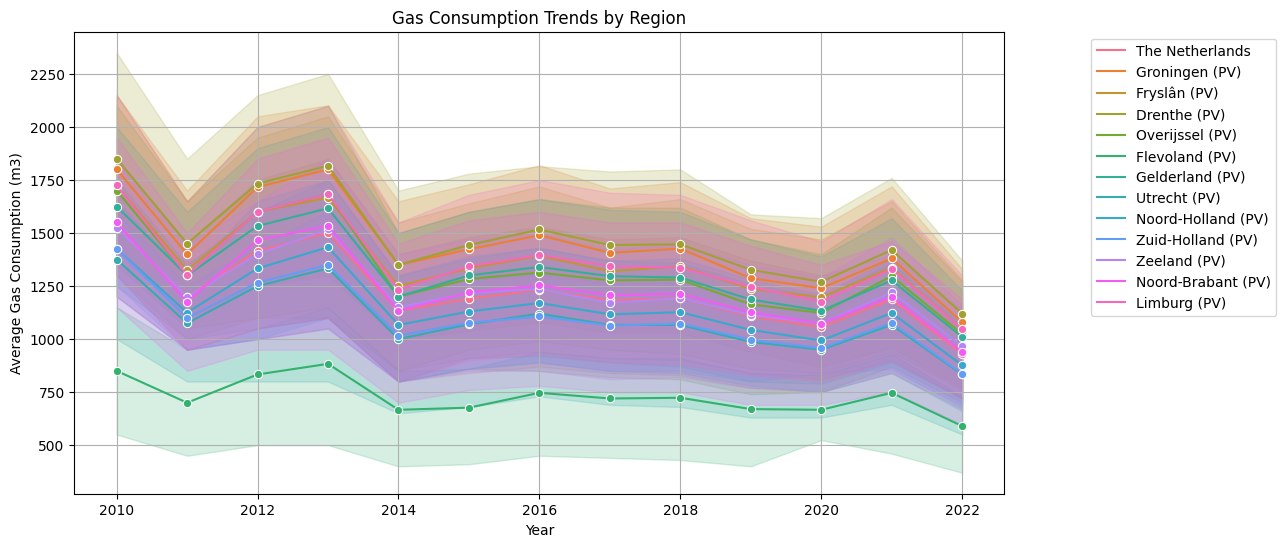

C:\Users\mahmo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mahmo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mahmo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mahmo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

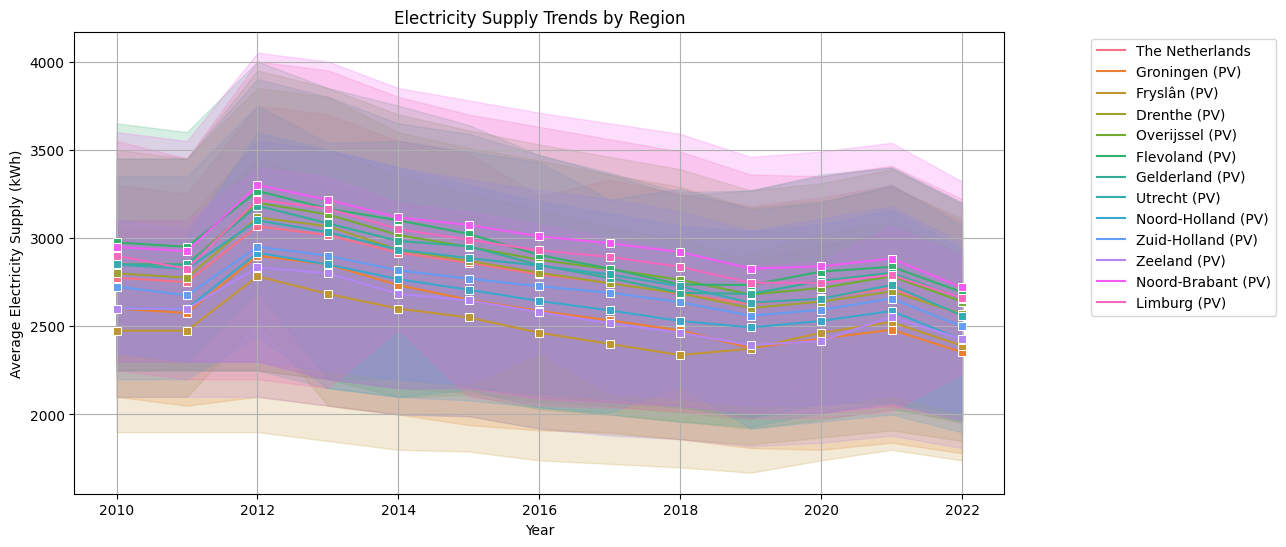

In [26]:
# Clean and convert numerical columns
df_regional["AvgGasConsumptionResedetial"] = (
    df_regional["AvgGasConsumptionResedetial"].astype(str).str.strip().replace({".": None, "": None}).astype(float)
)
df_regional["AvgElectricitySupplyResedential"] = (
    df_regional["AvgElectricitySupplyResedential"].astype(str).str.strip().replace({".": None, "": None}).astype(float)
)

# Extract numeric years
df_regional["Year"] = df_regional["Year"].astype(str).str.extract(r"(\d+)")[0].astype(int)

# Plot gas consumption trends by region
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_regional, x="Year", y="AvgGasConsumptionResedetial", hue="Regions", marker="o")
plt.xlabel("Year")
plt.ylabel("Average Gas Consumption (m3)")
plt.title("Gas Consumption Trends by Region")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

# Plot electricity supply trends by region
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_regional, x="Year", y="AvgElectricitySupplyResedential", hue="Regions", marker="s")
plt.xlabel("Year")
plt.ylabel("Average Electricity Supply (kWh)")
plt.title("Electricity Supply Trends by Region")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()


In [32]:
import scipy.stats as stats
from statsmodels.formula.api import ols  # Importing OLS for ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from IPython.display import display 

In [35]:
# Dropping rows with missing values in gas and electricity columns
df_cleaned = df_regional[df_regional["Regions"] != "The Netherlands"].dropna(subset=["AvgGasConsumptionResedetial", "AvgElectricitySupplyResedential"])



In [37]:
# Perform ANOVA, Kruskal-Wallis, and Tukey’s HSD test again
gas_model = ols("AvgGasConsumptionResedetial ~ C(Regions)", data=df_cleaned).fit()
gas_anova = sm.stats.anova_lm(gas_model, typ=2)

elec_model = ols("AvgElectricitySupplyResedential ~ C(Regions)", data=df_cleaned).fit()
elec_anova = sm.stats.anova_lm(elec_model, typ=2)

# Levene’s Test for variance homogeneity
gas_levene = stats.levene(*[df_cleaned[df_cleaned["Regions"] == region]["AvgGasConsumptionResedetial"]
                             for region in df_cleaned["Regions"].unique()])
elec_levene = stats.levene(*[df_cleaned[df_cleaned["Regions"] == region]["AvgElectricitySupplyResedential"]
                              for region in df_cleaned["Regions"].unique()])

# Kruskal-Wallis Test
gas_kruskal = stats.kruskal(*[df_cleaned[df_cleaned["Regions"] == region]["AvgGasConsumptionResedetial"]
                               for region in df_cleaned["Regions"].unique()])
elec_kruskal = stats.kruskal(*[df_cleaned[df_cleaned["Regions"] == region]["AvgElectricitySupplyResedential"]
                                for region in df_cleaned["Regions"].unique()])

# Tukey’s HSD Test (only if ANOVA is significant)
if gas_anova["PR(>F)"][0] < 0.05:
    tukey_gas = pairwise_tukeyhsd(df_cleaned["AvgGasConsumptionResedetial"], df_cleaned["Regions"])
    tukey_gas_df = pd.DataFrame(data=tukey_gas.summary().data[1:], columns=tukey_gas.summary().data[0])
else:
    tukey_gas_df = None

if elec_anova["PR(>F)"][0] < 0.05:
    tukey_elec = pairwise_tukeyhsd(df_cleaned["AvgElectricitySupplyResedential"], df_cleaned["Regions"])
    tukey_elec_df = pd.DataFrame(data=tukey_elec.summary().data[1:], columns=tukey_elec.summary().data[0])
else:
    tukey_elec_df = None

# Display results
display(gas_anova, elec_anova, gas_levene, elec_levene, gas_kruskal, elec_kruskal)

if tukey_gas_df is not None:
    print("\nTukey's HSD Test Results for Gas Consumption (without 'The Netherlands'):\n")
    display(tukey_gas_df)

if tukey_elec_df is not None:
    print("\nTukey's HSD Test Results for Electricity Supply (without 'The Netherlands'):\n")
    display(tukey_elec_df)


C:\Users\mahmo\AppData\Local\Temp\ipykernel_12728\2224579154.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if gas_anova["PR(>F)"][0] < 0.05:
C:\Users\mahmo\AppData\Local\Temp\ipykernel_12728\2224579154.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if elec_anova["PR(>F)"][0] < 0.05:


,sum_sq,df,F,PR(>F)
C(Regions),1.651772e+07,11.0,12.56638,1.065746e-20
Residual,5.162155e+07,432.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Regions),1.009206e+07,11.0,2.577347,0.003544
Residual,1.537793e+08,432.0,NaN,NaN


LeveneResult(statistic=2.7630247896385347, pvalue=0.0017816435698349482)

LeveneResult(statistic=1.2798991508419921, pvalue=0.23310898976080854)

KruskalResult(statistic=99.7053675683309, pvalue=2.042562683758346e-16)

KruskalResult(statistic=36.229500705312304, pvalue=0.0001549877367972545)


Tukey's HSD Test Results for Gas Consumption (without 'The Netherlands'):



,group1,group2,meandiff,p-adj,lower,upper,reject
0,Drenthe (PV),Flevoland (PV),-740.2703,0.0000,-1004.3725,-476.1681,True
1,Drenthe (PV),Fryslân (PV),-107.8378,0.9731,-371.9400,156.2643,False
2,Drenthe (PV),Gelderland (PV),-158.3784,0.7131,-422.4806,105.7238,False
3,Drenthe (PV),Groningen (PV),-28.6486,1.0000,-292.7508,235.4535,False
4,Drenthe (PV),Limburg (PV),-108.1081,0.9726,-372.2103,155.9941,False
...,...,...,...,...,...,...,...
61,Overijssel (PV),Zeeland (PV),-94.8649,0.9902,-358.9670,169.2373,False
62,Overijssel (PV),Zuid-Holland (PV),-222.1622,0.1993,-486.2643,41.9400,False
63,Utrecht (PV),Zeeland (PV),137.5676,0.8622,-126.5346,401.6697,False
64,Utrecht (PV),Zuid-Holland (PV),10.2703,1.0000,-253.8319,274.3725,False



Tukey's HSD Test Results for Electricity Supply (without 'The Netherlands'):



,group1,group2,meandiff,p-adj,lower,upper,reject
0,Drenthe (PV),Flevoland (PV),129.7297,0.9987,-326.1029,585.5624,False
1,Drenthe (PV),Fryslân (PV),-290.2703,0.6284,-746.1029,165.5624,False
2,Drenthe (PV),Gelderland (PV),62.1622,1.0000,-393.6705,517.9948,False
3,Drenthe (PV),Groningen (PV),-212.9730,0.9300,-668.8056,242.8597,False
4,Drenthe (PV),Limburg (PV),113.2432,0.9996,-342.5894,569.0759,False
...,...,...,...,...,...,...,...
61,Overijssel (PV),Zeeland (PV),-292.1622,0.6186,-747.9948,163.6705,False
62,Overijssel (PV),Zuid-Holland (PV),-160.8108,0.9916,-616.6435,295.0218,False
63,Utrecht (PV),Zeeland (PV),-235.4054,0.8689,-691.2381,220.4272,False
64,Utrecht (PV),Zuid-Holland (PV),-104.0541,0.9998,-559.8867,351.7786,False


Conclusion:
1. ANOVA Results
Gas Consumption Differences Across Regions
F = 12.57, p < 0.0001 → Statistically significant regional differences.
Electricity Supply Differences Across Regions
F = 2.58, p = 0.0035 → Statistically significant regional differences, but weaker than gas consumption.
- Conclusion: Both gas consumption and electricity supply vary significantly across regions.

2. Levene’s Test (Variance Equality)
Gas Consumption: 𝑝=0.0017 -> Variance is not equal (violates ANOVA assumption).
Electricity Supply: 𝑝=0.2331 → Variance is equal (ANOVA assumption holds).
- Conclusion:
  1. Gas Consumption should rely more on the Kruskal-Wallis test due to unequal variance.
  2.  Electricity Supply can be trusted with ANOVA results since variance is homogeneous.

3. Kruskal-Wallis Test (Non-parametric alternative)
Gas Consumption: 𝑝<0.0001 → Significant differences across regions confirmed.
Electricity Supply: 𝑝=0.0002 → Significant differences across regions confirmed.
- Conclusion: Even after accounting for variance issues, both gas and electricity supply have meaningful regional differences.

4. Tukey’s HSD Test (Pairwise Regional Comparisons)
Tukey’s test identifies which specific regions differ significantly.

Gas Consumption: Only Drenthe vs. Flevoland shows a significant difference (p = 0.0000).
All other regional differences are not statistically significant (p > 0.05).
Electricity Supply:

No significant pairwise differences detected (all p-values > 0.05).

